In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,export_text,plot_tree

In [3]:
df = pd.read_csv("C:\\Users\\SOORAJ\\Downloads\\heart failure\\Heart_Failure_Details.csv")
df

,age,anaemia,creatinine phosphokinase,diabetes,ejection fraction,high bp,platelets,serum creatinine,serum sodium,sex,smoking,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,0


In [6]:
df.head()

,age,anaemia,creatinine phosphokinase,diabetes,ejection fraction,high bp,platelets,serum creatinine,serum sodium,sex,smoking,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


In [13]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine phosphokinase    0
diabetes                    0
ejection fraction           0
high bp                     0
platelets                   0
serum creatinine            0
serum sodium                0
sex                         0
smoking                     0
death                       0
dtype: int64

C:\Users\SOORAJ\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


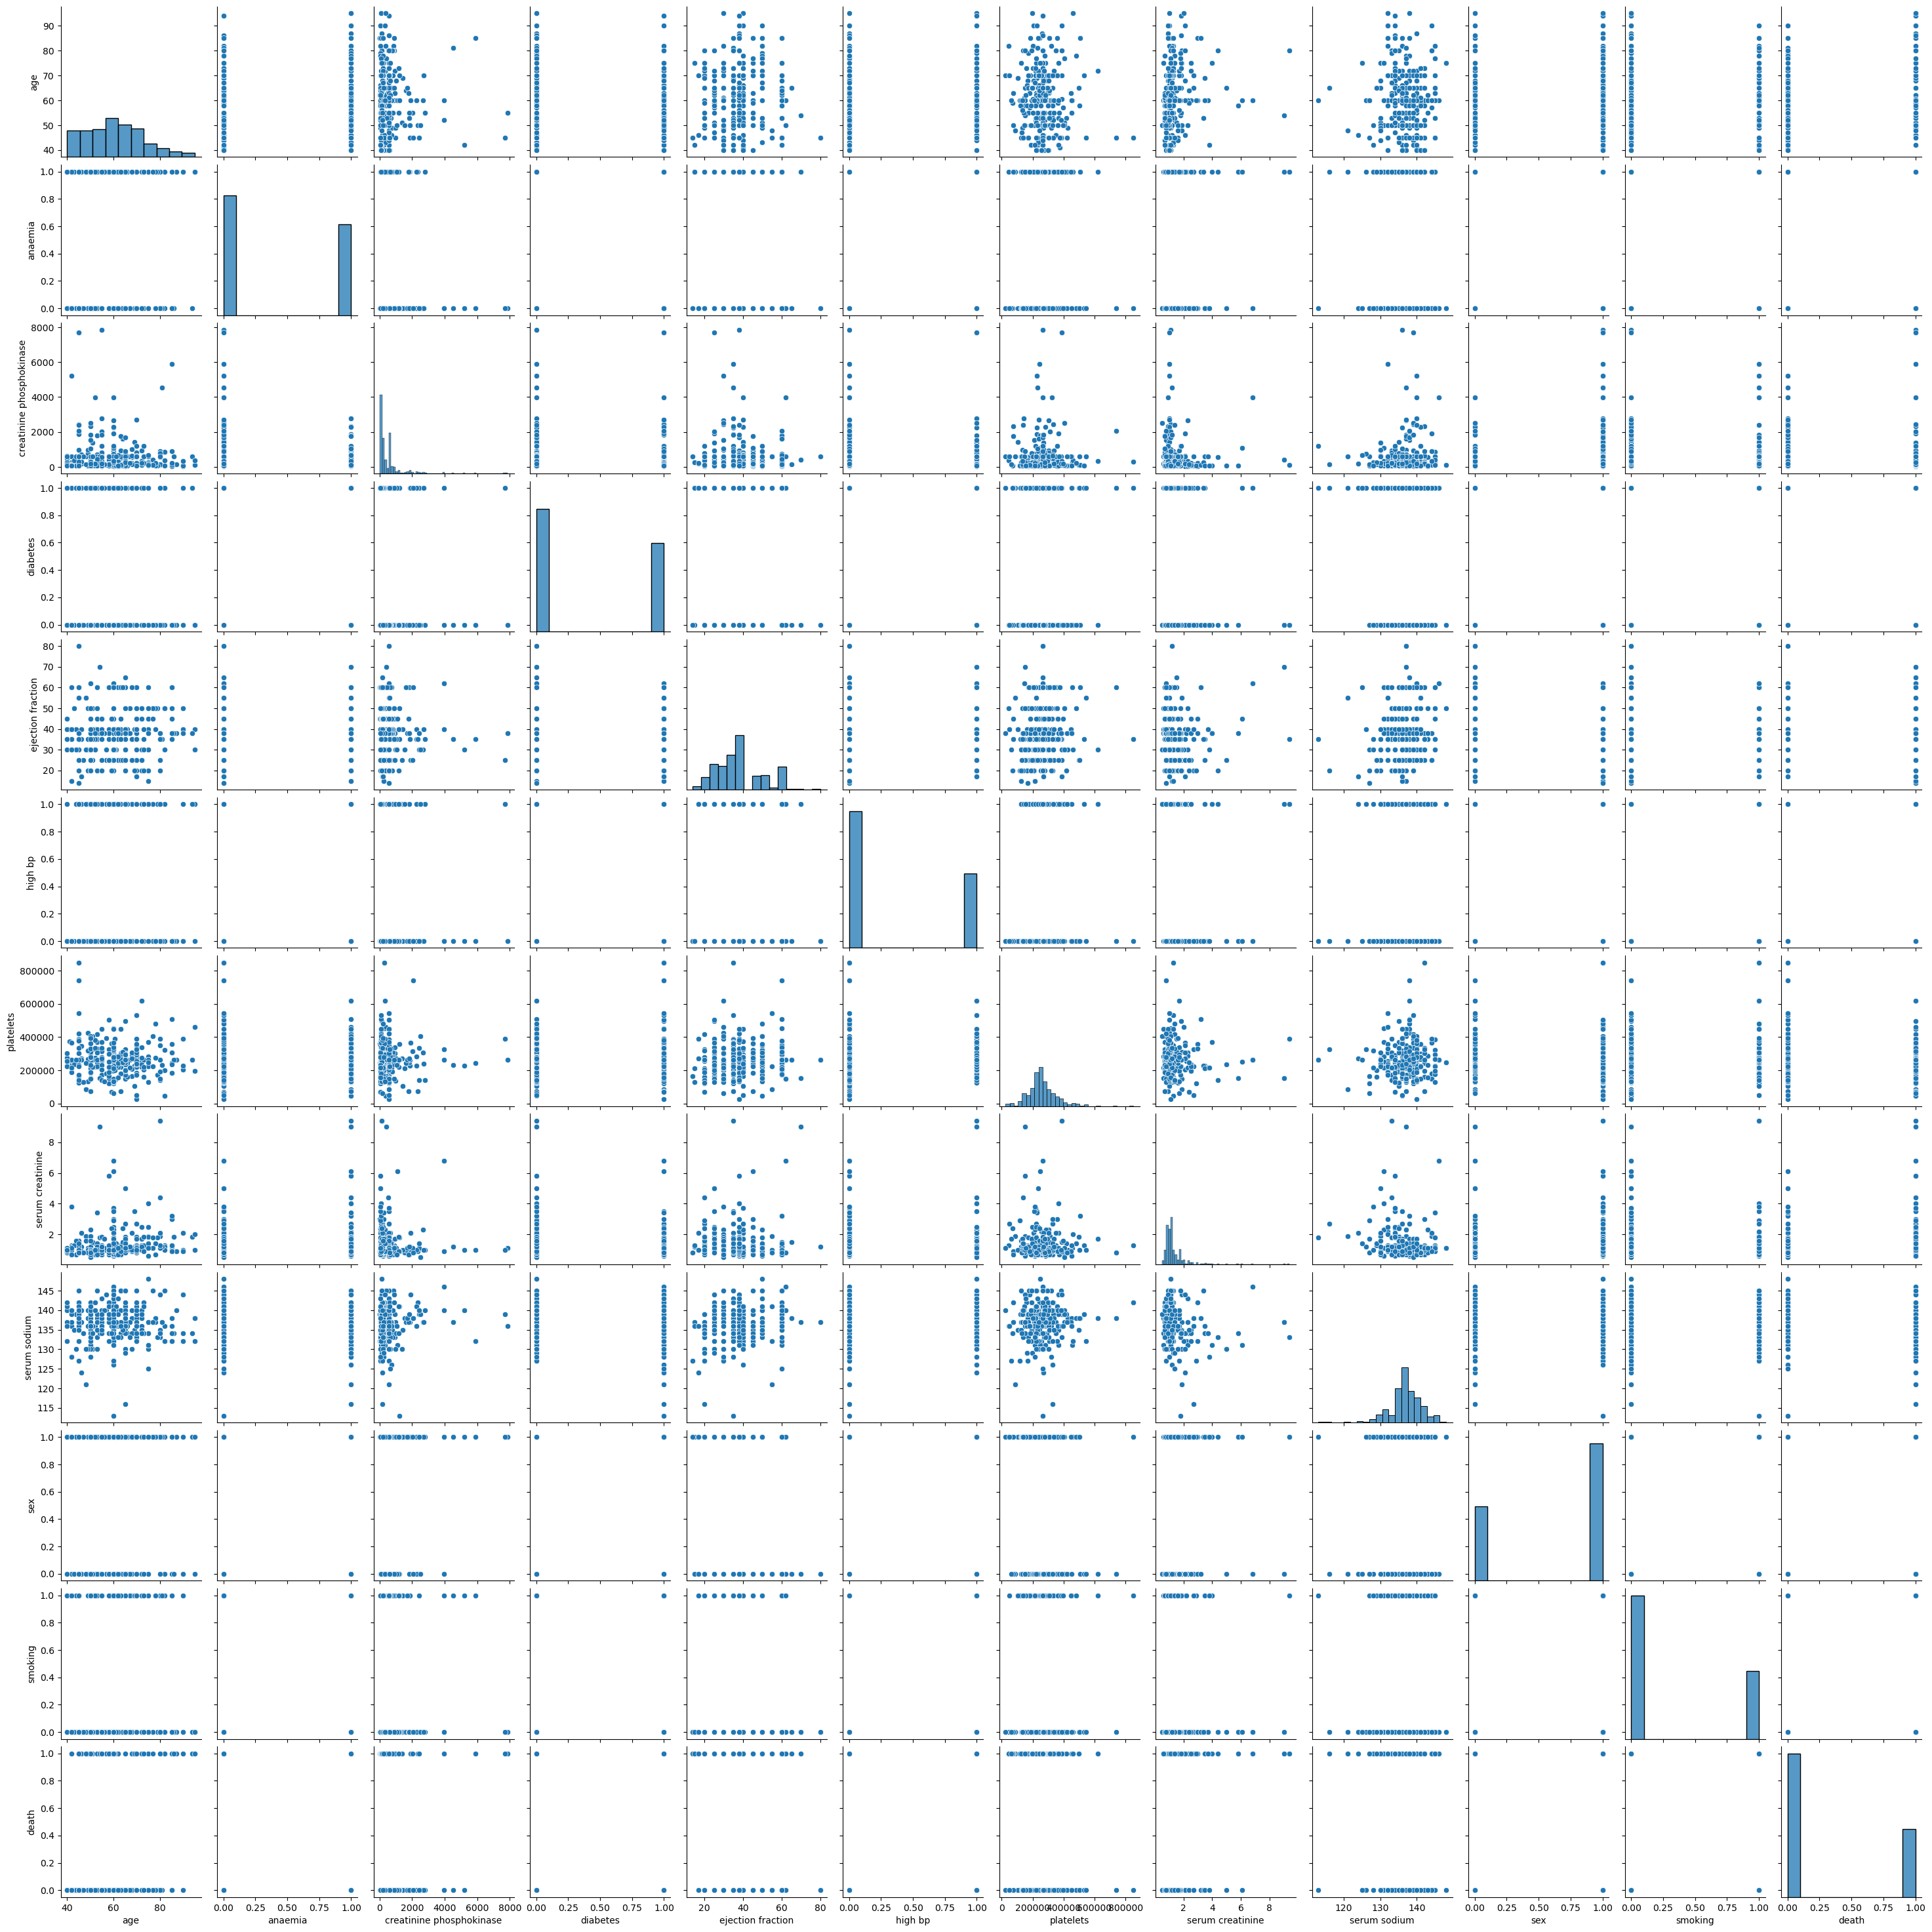

In [18]:
sns.pairplot(data=df)

<Axes: xlabel='serum sodium', ylabel='Count'>

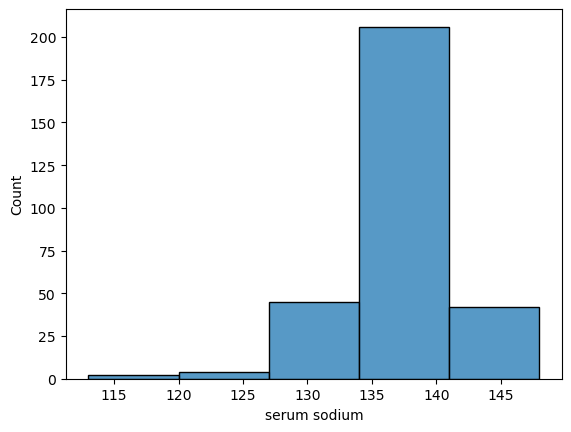

In [19]:
sns.histplot(data = df,x='serum sodium',bins=5)

<Axes: xlabel='ejection fraction', ylabel='count'>

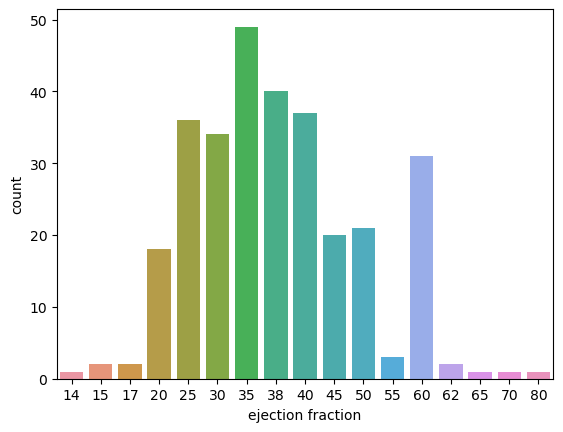

In [22]:
sns.countplot(x= 'ejection fraction',data=df)

In [5]:
x= df.iloc[:,:-1]
x

,age,anaemia,creatinine phosphokinase,diabetes,ejection fraction,high bp,platelets,serum creatinine,serum sodium,sex,smoking
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0
...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1


In [7]:
y= df.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: death, Length: 299, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=7)
x_train,x_test,y_train,y_test

(        age  anaemia  creatinine phosphokinase  diabetes  ejection fraction  \
 188  60.667        1                       151         1                 40   
 94   58.000        0                       144         1                 38   
 126  46.000        0                       168         1                 17   
 242  40.000        0                        90         0                 35   
 78   75.000        1                       203         1                 38   
 ..      ...      ...                       ...       ...                ...   
 211  50.000        0                       582         0                 62   
 67   72.000        1                       110         0                 25   
 25   80.000        0                       148         1                 38   
 196  45.000        0                       582         1                 38   
 175  60.000        1                        95         0                 60   
 
      high bp  platelets  serum creati

In [9]:
#created on instance of the standardscaler class called ss
SS= StandardScaler()

In [10]:
#transformed both traning and test datasets
X_train= SS.fit_transform(x_train)
X_test= SS.transform(x_test)

In [11]:
#created an instance of the "logisticRegression"class called lr
LR=LogisticRegression()
LR

LogisticRegression()

In [12]:
#created an instance of the "logisticRegression"class called lr
LR.fit(X_train,y_train)

LogisticRegression()

In [13]:
#prediction
y_pred=LR.predict(x_test)
y_pred

C:\Users\SOORAJ\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [14]:
y_test

268    0
240    0
278    0
176    0
202    0
98     0
125    0
293    0
3      1
128    0
243    0
245    0
70     0
91     0
57     0
286    0
291    0
177    0
115    0
108    0
111    0
55     1
104    0
101    0
2      1
234    0
231    0
74     1
138    0
263    0
118    0
122    0
170    0
226    0
236    0
164    1
37     1
272    0
88     0
102    0
239    0
187    1
18     1
214    0
145    0
287    0
168    0
182    1
22     1
99     0
213    1
147    0
154    0
65     1
60     1
66     1
241    0
81     0
86     0
277    0
Name: death, dtype: int64

In [15]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[46, 14],
       [ 0,  0]], dtype=int64)

In [16]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87        60
           1       0.00      0.00      0.00         0

    accuracy                           0.77        60
   macro avg       0.50      0.38      0.43        60
weighted avg       1.00      0.77      0.87        60



C:\Users\SOORAJ\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SOORAJ\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SOORAJ\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Model Accuracy:{accuracy*100:.2f}%")



Model Accuracy:76.67%


In [21]:
prec = precision_score(y_test, y_pred)
print("Precision:",prec)

Precision: 0.0


C:\Users\SOORAJ\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
knn_model=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn_model.fit(x_train , y_train)

KNeighborsClassifier()

In [56]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Model Accuracy:{accuracy*100:.2f}%")

Model Accuracy:65.56%


In [23]:
recall=recall_score(y_test,y_pred)
print("recall:",recall)

recall: 0.0


In [24]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[46,  0],
       [14,  0]], dtype=int64)

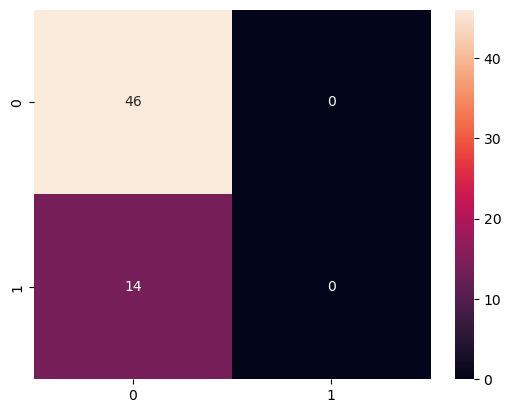

In [25]:
sns.heatmap(cm,annot=True)
plt.show()

In [26]:
Classifier=SVC(kernel='linear')
Classifier

SVC(kernel='linear')

In [55]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Model Accuracy:{accuracy*100:.2f}%")

Model Accuracy:65.56%


In [27]:
df.isna().sum()

age                         0
anaemia                     0
creatinine phosphokinase    0
diabetes                    0
ejection fraction           0
high bp                     0
platelets                   0
serum creatinine            0
serum sodium                0
sex                         0
smoking                     0
death                       0
dtype: int64

In [30]:
cols=['age','smoking']
x=df[cols]
y=df.iloc[:,-1]

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [32]:
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [33]:
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=2,random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [34]:
y_pred=classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1], dtype=int64)

In [35]:
y_test

206    0
188    0
12     1
219    0
237    0
      ..
76     0
210    0
223    0
253    0
235    0
Name: death, Length: 90, dtype: int64

In [36]:
print(accuracy_score(y_pred,y_test))

0.6666666666666666


In [37]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79        78
           1       0.18      0.42      0.25        12

    accuracy                           0.67        90
   macro avg       0.53      0.56      0.52        90
weighted avg       0.79      0.67      0.71        90



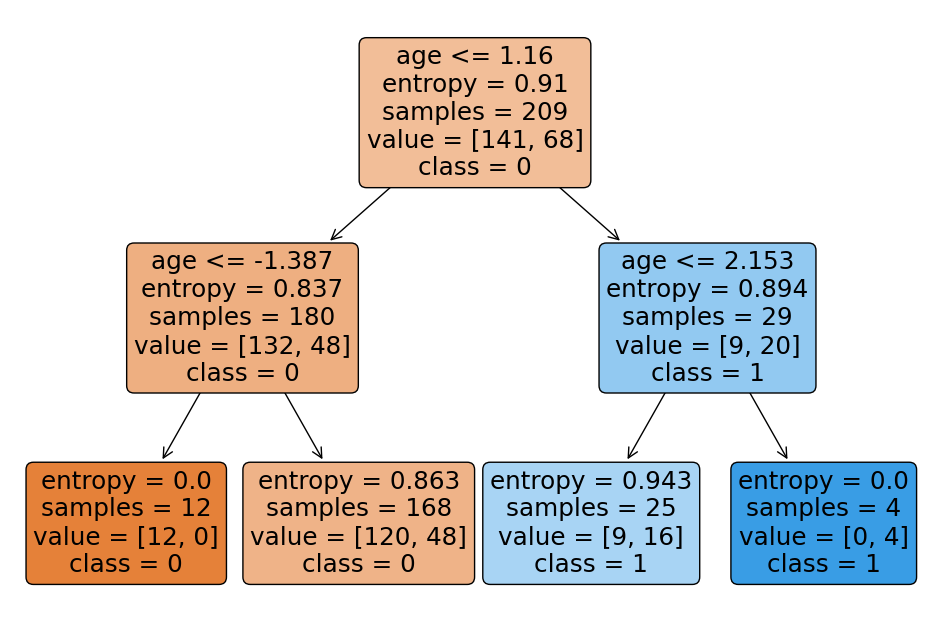

In [38]:
tree_text=export_text(classifier,feature_names=cols)
plt.figure(figsize=(12,8))
plot_tree(classifier,filled=True,rounded=True,feature_names=cols,class_names=['0','1'])
plt.show()

# RandomForestClassifier


In [39]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion="entropy")
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [40]:
y_pred=classifier.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1], dtype=int64)

In [41]:
y_test

206    0
188    0
12     1
219    0
237    0
      ..
76     0
210    0
223    0
253    0
235    0
Name: death, Length: 90, dtype: int64

In [42]:
print(accuracy_score(y_pred,y_test))

0.6555555555555556


In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
encoder=LabelEncoder()
df['sex']=encoder.fit_transform(df['sex'])
df['sex']

0      1
1      1
2      1
3      1
4      0
      ..
294    1
295    0
296    0
297    1
298    1
Name: sex, Length: 299, dtype: int64

In [46]:
dist=df.sex.value_counts()
dist

sex
1    194
0    105
Name: count, dtype: int64

<Axes: xlabel='sex'>

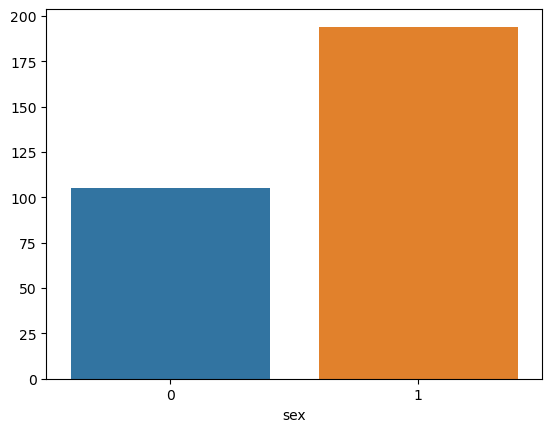

In [47]:
sns.barplot(x=dist.index,y=dist.values)

In [49]:
x=df.iloc[:,[2,4]].values
x

array([[ 582,   20],
       [7861,   38],
       [ 146,   20],
       [ 111,   20],
       [ 160,   20],
       [  47,   40],
       [ 246,   15],
       [ 315,   60],
       [ 157,   65],
       [ 123,   35],
       [  81,   38],
       [ 231,   25],
       [ 981,   30],
       [ 168,   38],
       [  80,   30],
       [ 379,   50],
       [ 149,   38],
       [ 582,   14],
       [ 125,   25],
       [ 582,   55],
       [  52,   25],
       [ 128,   30],
       [ 220,   35],
       [  63,   60],
       [ 582,   30],
       [ 148,   38],
       [ 112,   40],
       [ 122,   45],
       [  60,   38],
       [  70,   30],
       [ 582,   38],
       [  23,   45],
       [ 249,   35],
       [ 159,   30],
       [  94,   50],
       [ 582,   35],
       [  60,   50],
       [ 855,   50],
       [2656,   30],
       [ 235,   38],
       [ 582,   20],
       [ 124,   30],
       [ 571,   45],
       [ 127,   50],
       [ 588,   60],
       [ 582,   38],
       [1380,   25],
       [ 582,

In [50]:
from sklearn.cluster import KMeans
wcss_List=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss_List.append(kmeans.inertia_)

C:\Users\SOORAJ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SOORAJ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\SOORAJ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SOORAJ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

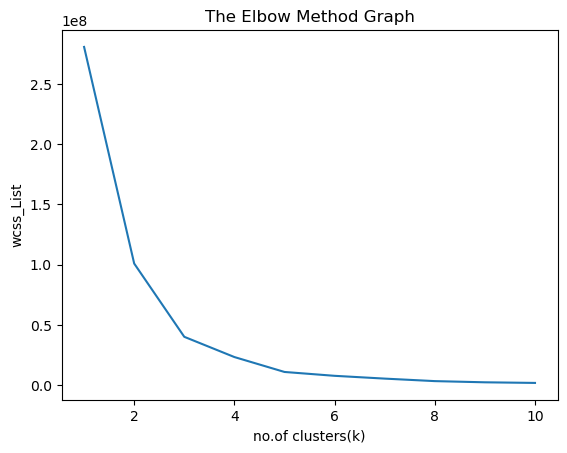

In [51]:
plt.plot(range(1,11),wcss_List)
plt.title('The Elbow Method Graph')
plt.xlabel('no.of clusters(k)')
plt.ylabel('wcss_List')
plt.show()

In [52]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_predict=kmeans.fit_predict(x)

C:\Users\SOORAJ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SOORAJ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [53]:
y_predict

array([4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 4, 0, 0,
       0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 4, 2, 0, 4, 0, 4, 0,
       4, 4, 2, 4, 4, 0, 4, 0, 1, 0, 0, 0, 0, 4, 4, 0, 3, 0, 0, 4, 4, 0,
       0, 0, 0, 0, 0, 4, 1, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 4, 0, 0, 0, 4, 0, 0, 0, 0, 4, 4, 1, 0, 0, 4, 2, 4, 0,
       0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 4, 0, 0, 4, 4, 0, 0, 0, 0, 0, 2, 4,
       4, 0, 1, 4, 0, 4, 0, 2, 4, 0, 4, 0, 4, 0, 0, 2, 4, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 4, 0, 0, 0, 4, 2, 2, 4, 0, 0, 4, 4, 4, 1, 0, 0, 0, 0,
       2, 0, 0, 4, 4, 0, 0, 0, 0, 0, 4, 2, 0, 0, 4, 0, 0, 0, 4, 4, 4, 0,
       4, 4, 2, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0, 4, 0, 0, 0, 4, 4, 4, 4, 4,
       4, 0, 0, 4, 4, 4, 0, 2, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 4, 0, 0, 4,
       0, 4, 4, 0, 2, 0, 4, 0, 2, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0,
       4, 0, 4, 0, 4, 4, 4, 4, 0, 0, 0, 4, 4, 4, 4, 0, 2, 4, 0, 2, 0, 0,
       0, 4, 4, 0, 4, 0, 0, 0, 0, 2, 2, 2, 0])

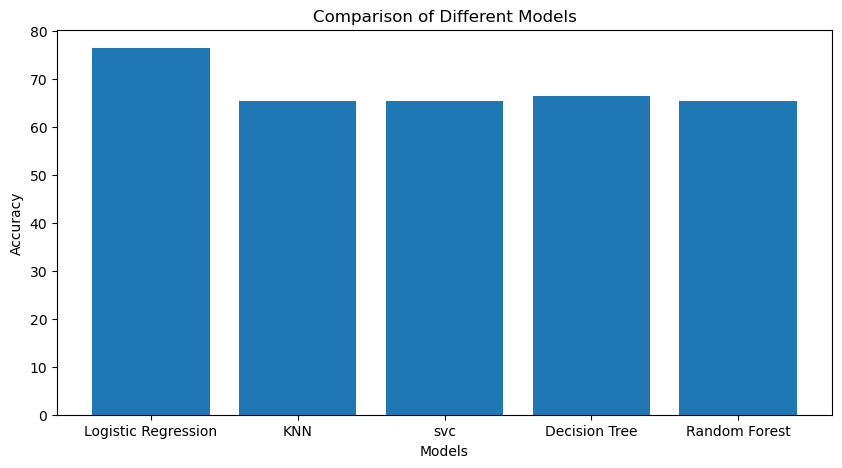

In [3]:
plt.figure(figsize=(10, 5))
plt.title('Comparison of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
x = np.array(["Logistic Regression", "KNN", "svc", "Decision Tree","Random Forest"])
y = np.array([76.5,65.5,65.5,66.6,65.5])

plt.bar(x,y)
plt.show()